**NAME:** Xander Sam E. Galapia

**SECTION:** CPE22S3

In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [6]:
pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [8]:
combd = pd.concat([X, y], axis=1)
combd

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [9]:
combd.rename(columns = {'marital-status': 'marital_status',
                        'native-country': 'Birthplace',
                        'hours-per-week' : 'Weekly_Hours',
                        'capital-gain' : 'capital_gain',
                        'capital-loss' : 'capital_loss'
                     }, inplace = True)

In [10]:
high = combd.sort_values(by=["age"], ascending=False)
high

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,Weekly_Hours,Birthplace,income
46519,90,Private,272752,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,10,United-States,<=50K.
39537,90,Private,250832,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,2414,0,40,United-States,<=50K.
19212,90,Private,139660,Some-college,10,Divorced,Sales,Unmarried,Black,Female,0,0,37,United-States,<=50K
24043,90,Self-emp-not-inc,82628,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,2964,0,12,United-States,<=50K
5370,90,Local-gov,227796,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34434,17,Private,173740,10th,6,Never-married,Sales,Not-in-family,White,Female,0,0,15,United-States,<=50K.
21943,17,Private,295991,10th,6,Never-married,Adm-clerical,Own-child,White,Female,0,0,20,United-States,<=50K
43806,17,Private,34943,10th,6,Never-married,Other-service,Own-child,White,Female,0,0,15,United-States,<=50K.
22582,17,Private,198146,11th,7,Never-married,Sales,Own-child,White,Female,0,0,16,United-States,<=50K


In [11]:
t30b = combd.query('age <= 30').sort_values(by='age', ascending=True)
t30b

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,Weekly_Hours,Birthplace,income
43398,17,Private,89259,11th,7,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<=50K.
23660,17,Private,232713,10th,6,Never-married,Craft-repair,Not-in-family,White,Male,594,0,30,United-States,<=50K
46920,17,Private,140117,11th,7,Never-married,Sales,Own-child,White,Female,0,0,14,United-States,<=50K.
44542,17,Private,58037,10th,6,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K.
15373,17,Private,95799,11th,7,Never-married,Sales,Own-child,White,Female,0,0,18,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845,30,Private,88913,Some-college,10,Separated,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,United-States,<=50K
24953,30,Self-emp-not-inc,196342,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,25,United-States,<=50K
41905,30,Private,183801,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.
8878,30,Private,158688,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K


In [12]:
combd.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
Weekly_Hours       int64
Birthplace        object
income            object
dtype: object

In [13]:
wc = combd.workclass.unique()

wc


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [14]:
marst = combd.marital_status.unique()
marst

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [15]:
female = combd.query('sex == "Female"')
female

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,Weekly_Hours,Birthplace,income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K.
48827,55,Private,224655,HS-grad,9,Separated,Priv-house-serv,Not-in-family,White,Female,0,0,32,United-States,<=50K.
48828,38,Private,247547,Assoc-voc,11,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K.
48834,25,Private,350977,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K.


In [16]:
male = combd.query('sex == "Male"')
male

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,Weekly_Hours,Birthplace,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [17]:
rls = combd.relationship.unique()
rls

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [18]:
inc = combd.income.unique()
inc

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [19]:
inc_up = {'>50K.' : '>50K',
              '<=50K.' : '<=50K'}
combd.replace({'income':inc_up},inplace = True)

In [20]:
inc1 = combd.income.unique()
inc1

array(['<=50K', '>50K'], dtype=object)

In [21]:
t18b = combd.query('age <= 20 & education == "Bachelors"').sort_values(by='age', ascending=True)
t18b

,age,workclass,fnlwgt,education,education-num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,Weekly_Hours,Birthplace,income
1570,19,?,62534,Bachelors,13,Never-married,?,Own-child,Black,Female,0,0,40,Jamaica,<=50K
3591,19,Private,100999,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
8415,20,Private,216436,Bachelors,13,Never-married,Sales,Other-relative,Black,Female,0,0,30,United-States,<=50K


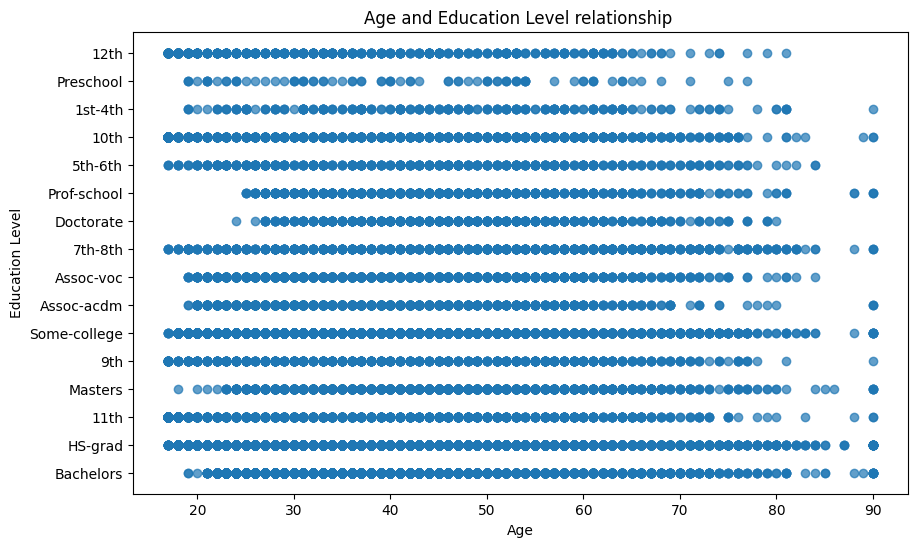

In [46]:
df = pd.DataFrame(combd)

plt.figure(figsize=(10, 6))
plt.scatter(df["age"], df["education"], alpha=0.7)

# Label axis
plt.xlabel("Age")
plt.ylabel("Education Level")

#Adding Title
plt.title("Age and Education Level relationship ")

#Displaying the plot
plt.show()

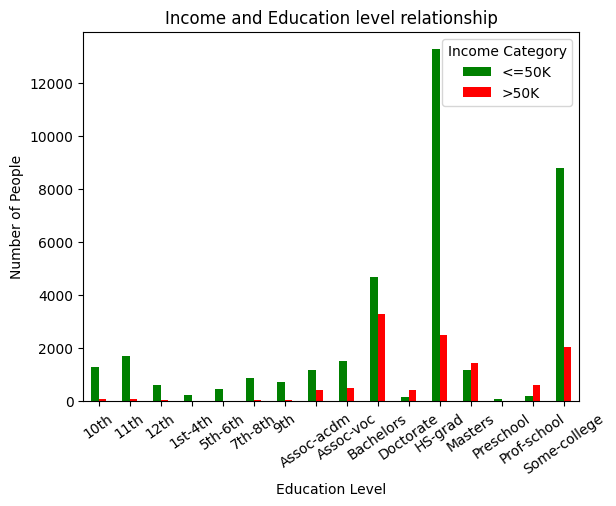

In [23]:
IncEd = df.groupby(['education', 'income']).size().unstack()


# Create the bar chart
IncEd.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.xlabel("Education Level")
plt.ylabel("Number of People")
plt.title("Income and Education level relationship")
plt.legend(title="Income Category")
plt.xticks(rotation=35)
plt.show()


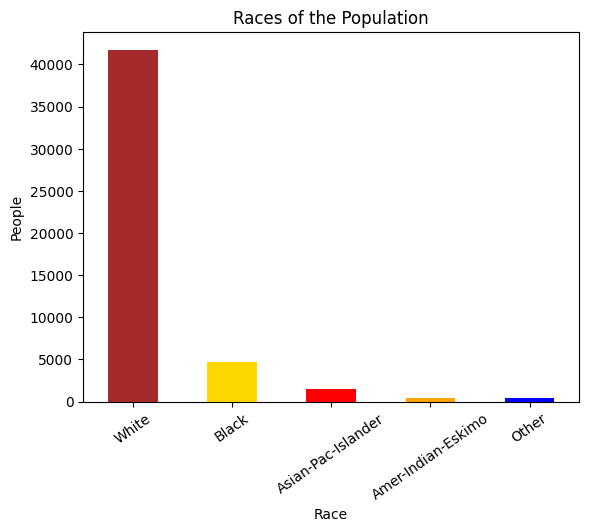

In [24]:
df.race.value_counts().plot(
    kind='bar', title='Races of the Population', rot=0, color = ['Brown', 'Gold', 'Red', 'Orange', 'Blue']
)


plt.xlabel('Race')
plt.ylabel('People')
plt.xticks(rotation=35)


plt.show()


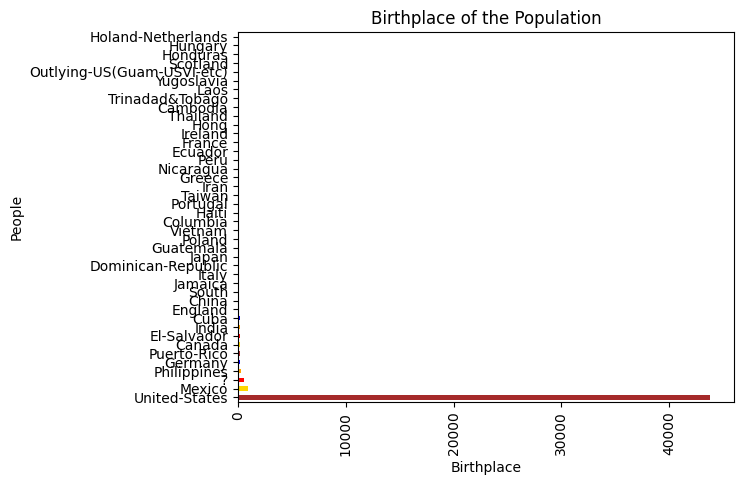

In [25]:
df.Birthplace.value_counts().plot(
    kind='barh', title='Birthplace of the Population', rot=0, color = ['Brown', 'Gold', 'Red', 'Orange', 'Blue']
)


plt.xlabel('Birthplace')
plt.ylabel('People')
plt.xticks(rotation=90)


plt.show()


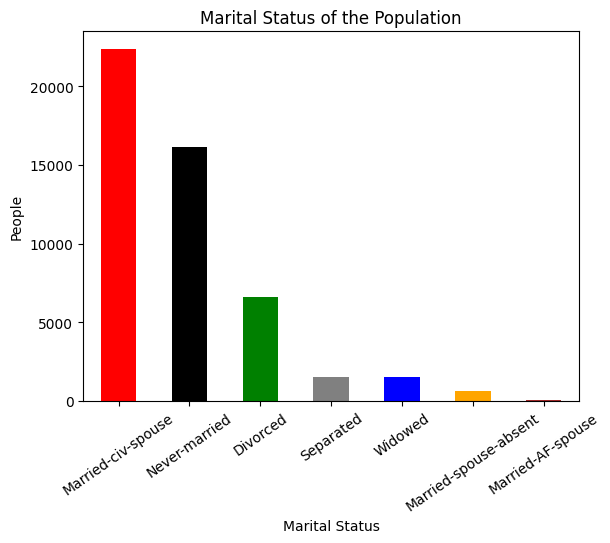

In [26]:
df.marital_status.value_counts().plot(
    kind='bar', title='Marital Status of the Population', rot=0, color = ['Red', 'Black', 'Green', 'Gray', 'Blue', 'Orange', 'Brown']
)

plt.xlabel('Marital Status')
plt.ylabel('People')
plt.xticks(rotation=35)

plt.show()


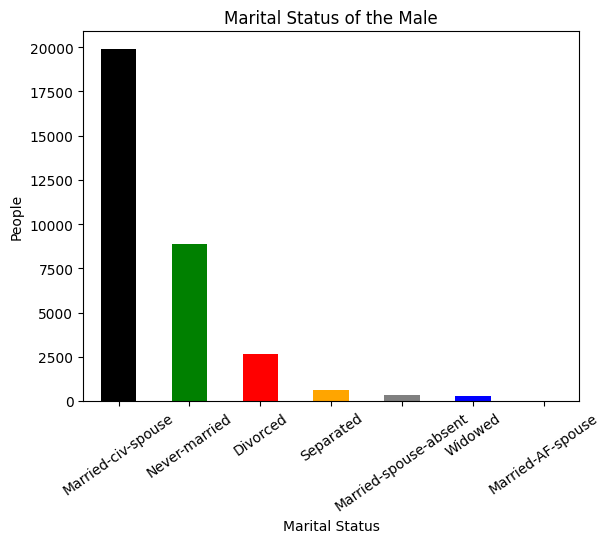

In [27]:
male.marital_status.value_counts().plot(
    kind='bar', title='Marital Status of the Male', rot=0, color = ['Black', 'Green', 'Red', 'Orange', 'Gray', 'Blue', 'Brown']
)

plt.xlabel('Marital Status')
plt.ylabel('People')
plt.xticks(rotation=35)

plt.show()


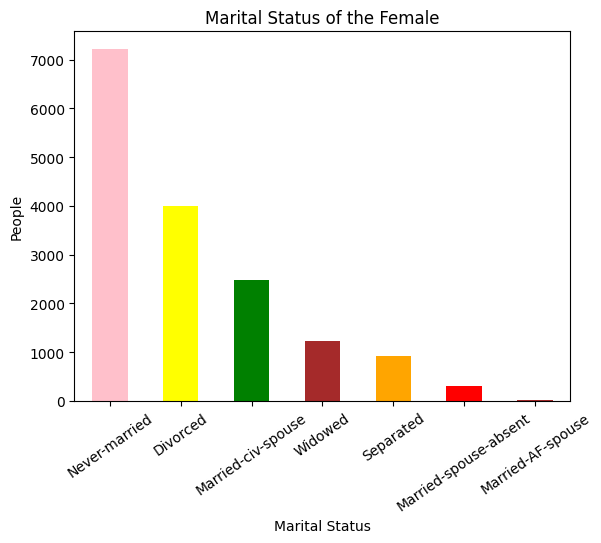

In [28]:
female.marital_status.value_counts().plot(
    kind='bar', title='Marital Status of the Female', rot=0, color = ['Pink', 'Yellow', 'Green', 'Brown', 'Orange', 'Red', 'Brown']
)

plt.xlabel('Marital Status')
plt.ylabel('People')
plt.xticks(rotation=35)

plt.show()


Text(0.5, 1.0, 'Age vs. Hours Worked per Week')

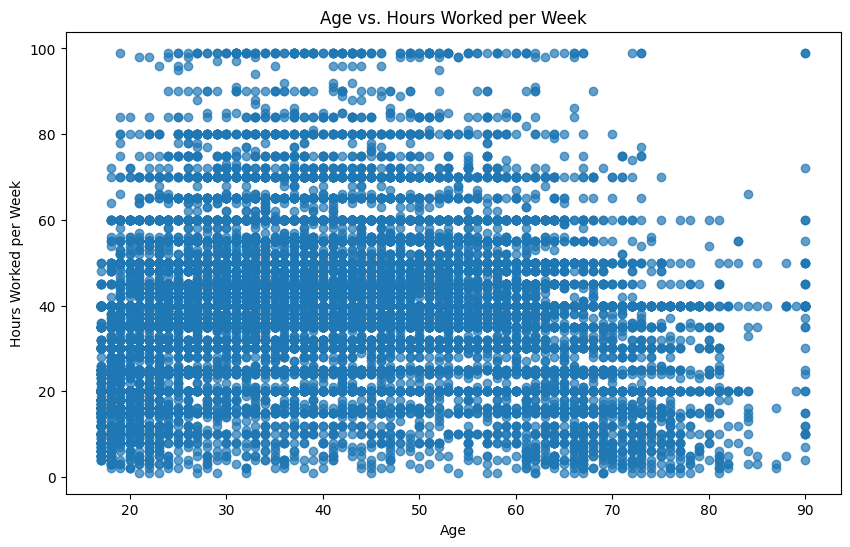

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df["age"], df["Weekly_Hours"], alpha=0.7)

# Label axis and add title
plt.xlabel("Age")
plt.ylabel("Hours Worked per Week")
plt.title("Age vs. Hours Worked per Week")

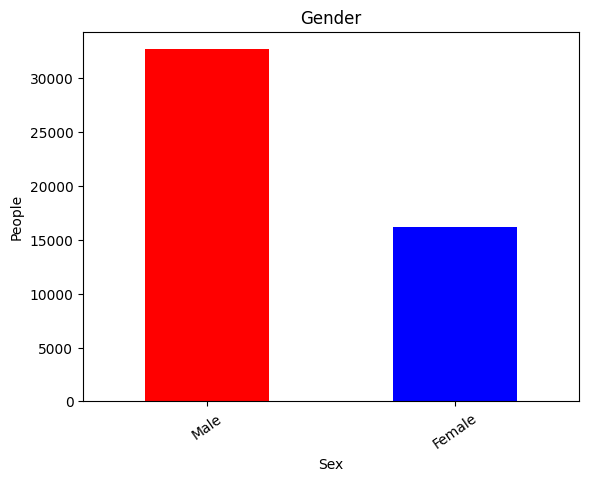

In [30]:
df.sex.value_counts().plot(
    kind='bar', title='Gender', rot=0, color = ['Red', 'Blue']
)

plt.xlabel('Sex')
plt.ylabel('People')
plt.xticks(rotation=35)


plt.show()

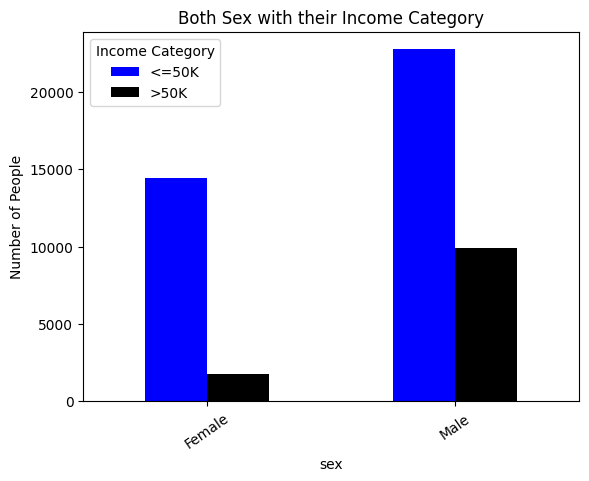

In [31]:
GIc = df.groupby(['sex', 'income']).size().unstack()


# Create the bar chart
GIc.plot(kind='bar', stacked=False, color=['Blue', 'Black'])
plt.xlabel("sex")
plt.ylabel("Number of People")
plt.title("Both Sex with their Income Category")
plt.legend(title="Income Category")
plt.xticks(rotation=35)
plt.show()


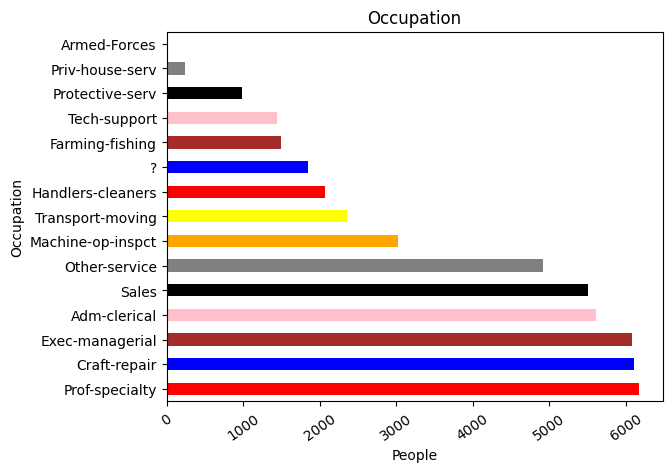

In [32]:
df.occupation.value_counts().plot(
    kind='barh', title='Occupation', rot=0, color = ['Red', 'Blue', 'Brown', 'Pink', 'Black','Gray','Orange','Yellow']
)

plt.xlabel('People')
plt.ylabel('Occupation')
plt.xticks(rotation=35)


plt.show()

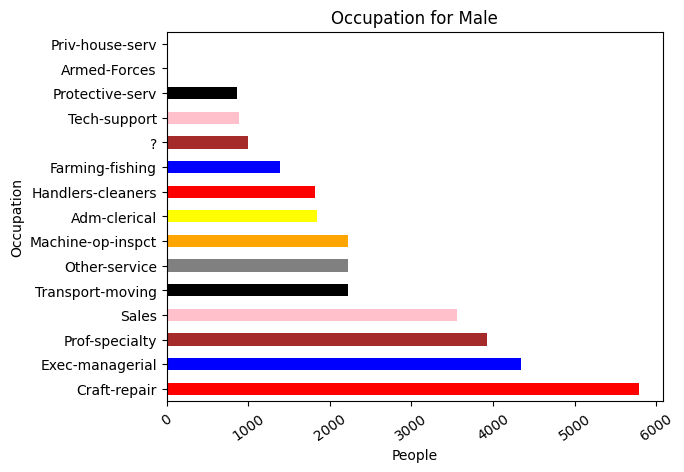

In [33]:
male.occupation.value_counts().plot(
    kind='barh', title='Occupation for Male', rot=0, color = ['Red', 'Blue', 'Brown', 'Pink', 'Black','Gray','Orange','Yellow']
)

plt.xlabel('People')
plt.ylabel('Occupation')
plt.xticks(rotation=35)


plt.show()

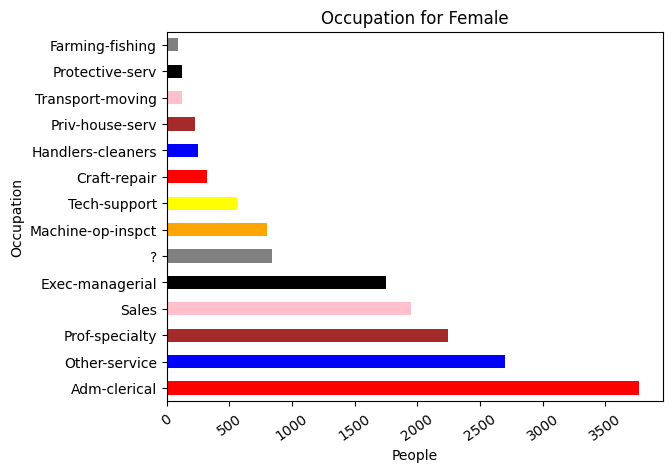

In [34]:
female.occupation.value_counts().plot(
    kind='barh', title='Occupation for Female', rot=0, color = ['Red', 'Blue', 'Brown', 'Pink', 'Black','Gray','Orange','Yellow']
)

plt.xlabel('People')
plt.ylabel('Occupation')
plt.xticks(rotation=35)


plt.show()

<ipython-input-35-3bc38fd75055>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


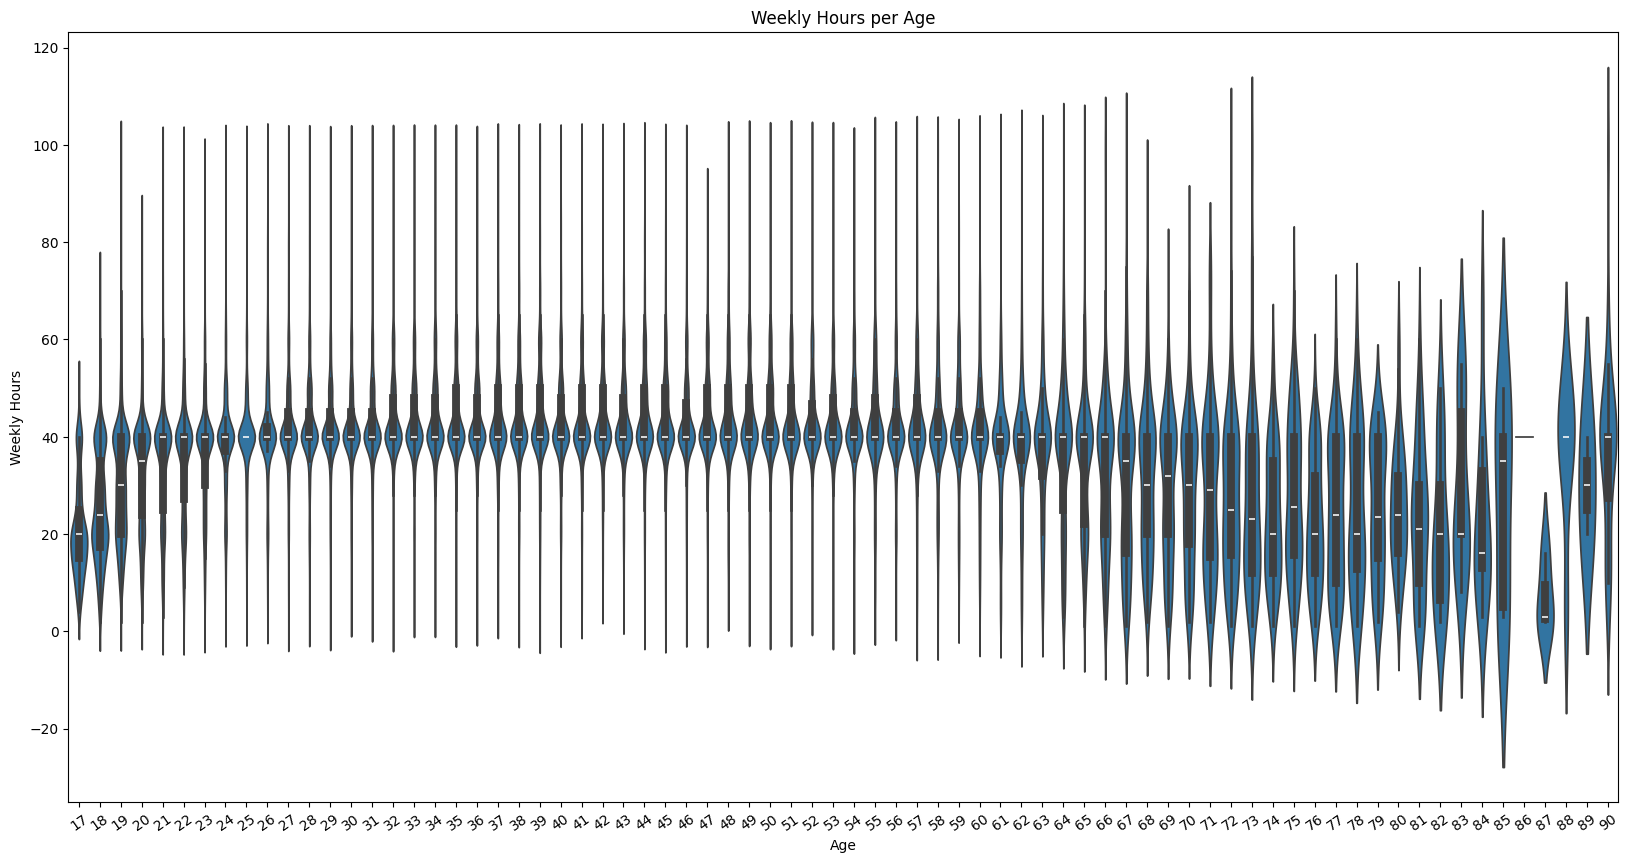

In [35]:
fig, axes = plt.subplots(figsize=(20, 10))
sns.violinplot(
    x="age",
    y="Weekly_Hours",
    data=df,        # Pass the entire DataFrame
    scale='width'   # Set same width for violins
)

plt.title('Weekly Hours per Age')

plt.xlabel('Age')
plt.ylabel('Weekly Hours')
plt.xticks(rotation=35)

plt.show()

<ipython-input-36-8b86efdcc8ed>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


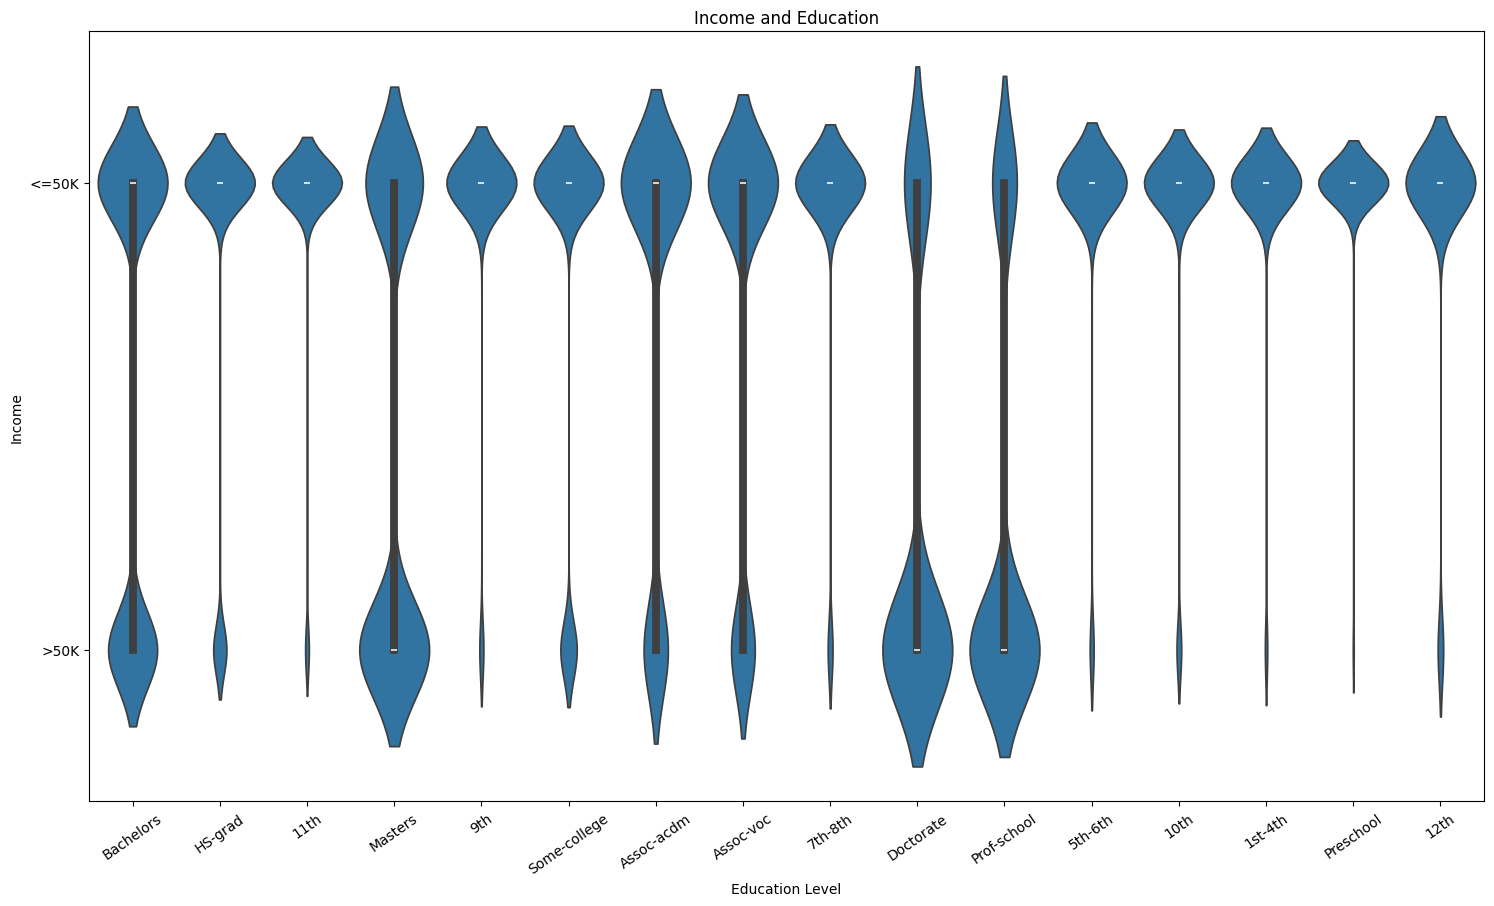

In [36]:
fig, axes = plt.subplots(figsize=(18, 10))
sns.violinplot(
    x="education",
    y="income",
    data=df,        # Pass the entire DataFrame
    scale='width'   # Set same width for violins
)

plt.title('Income and Education')

plt.xlabel('Education Level')
plt.ylabel('Income')
plt.xticks(rotation=35)

plt.show()

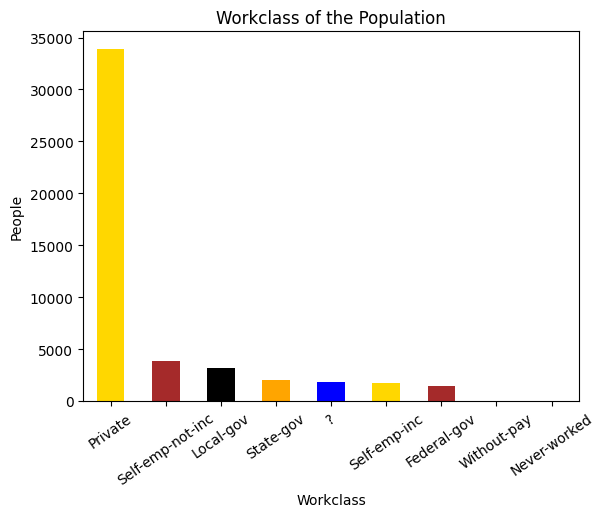

In [37]:
df.workclass.value_counts().plot(
    kind='bar', title='Workclass of the Population', rot=0, color = ['Gold', 'Brown', 'Black', 'Orange', 'Blue']
)


plt.xlabel('Workclass')
plt.ylabel('People')
plt.xticks(rotation=35)


plt.show()


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000')])

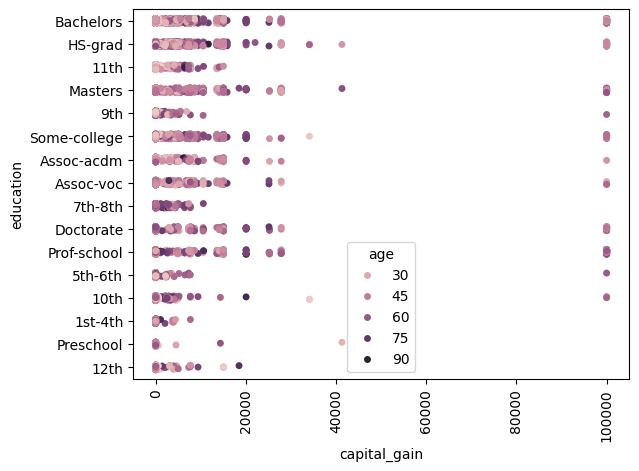

In [43]:
sns.stripplot(
    x='capital_gain',
    y='education',
    hue='age',
    data=df,
)
plt.xticks(rotation=90)


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000')])

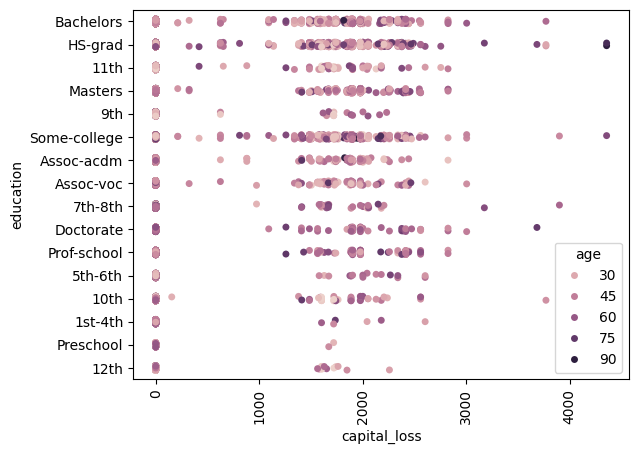

In [50]:
sns.stripplot(
    x='capital_loss',
    y='education',
    hue='age',
    data=df,
)
plt.xticks(rotation=90)
